In [89]:
import pandas as pd

In [114]:
df = pd.read_csv("fta_hscode.csv", dtype={'HS_CODE':str})
len(df)


2074940

In [115]:
pd.value_counts(df["HS_CODE"].unique()).sum()

12177

In [116]:
df['ITEM_NAME'] = df['ITEM_NAME'].str.replace(pat=r'[^A-Za-z0-9]', repl= r' ', regex=True)  # replace all special symbols to space
df['ITEM_NAME'] = df['ITEM_NAME'].str.replace(pat=r'[\s\s+]', repl= r' ', regex=True)  # replace multiple spaces with a single space

In [117]:
df

,HS_CODE,ITEM_NAME
0,8419909090,PAPER MACHINE PARTS
1,8419909090,PARAFFIN DISSOLVER PARTS
2,8419909090,PARA THIMMER
3,8419909090,PARS FOR CONSTANT TEMPERATURE AND HUMIDITY CHA...
4,8419909090,PART
5,8419909090,PART AIR PREHEATER
6,8419909090,PART CLEANER
7,8419909090,PART CLEANER AND PARTS
8,8419909090,PART COFFEE ROASTER
9,8419909090,PART FOR


In [118]:
df_2 = df.drop(df[df["ITEM_NAME"].isnull() == True].index)
print(df_2["ITEM_NAME"].isnull().sum())

0


In [119]:
df_2["HS_CODE"] = df_2["HS_CODE"].map(lambda x : x[:4])
df_2.tail()

,HS_CODE,ITEM_NAME
2074935,3926,RV PANEL KIT
2074936,3926,R WINDOW REVERS FORK B JIG
2074937,3926,R WINDOW REVERSE FORK B
2074938,3926,S CAP ESCAPE HOOD
2074939,3926,S CHARGER VEHICLE DOCK


In [120]:
pd.value_counts(df_2["HS_CODE"].unique()).sum()

1224

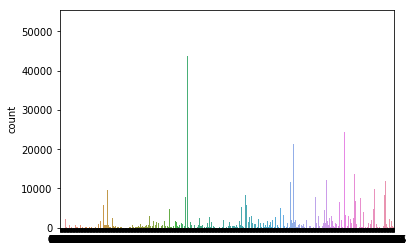

In [121]:
import seaborn as sns
x = df_2["HS_CODE"].values
sns.countplot(x)

In [149]:
dfhscode = pd.DataFrame(df_2.HS_CODE.groupby(df_2.HS_CODE).count().sort_values(ascending=False)[:50])

In [150]:
dfhscode.columns=["COUNT"]
dfhscode.tail()

,COUNT
HS_CODE,
2106,9555
8302,9514
3920,9432
9506,9137
7616,9107


In [151]:
df_3 = dfhscode.reset_index().rename(columns={"no":"HS_CODE"})
df_3.tail()

,HS_CODE,COUNT
45,2106,9555
46,8302,9514
47,3920,9432
48,9506,9137
49,7616,9107


In [158]:
final_df = pd.merge(df_2, df_3, left_on="HS_CODE", right_on="HS_CODE")

In [159]:
final_df = final_df.drop(columns=["COUNT"])

In [160]:
pd.value_counts(final_df["HS_CODE"].unique()).sum()

50

In [161]:
final_df["HS_CODE"] = final_df["HS_CODE"].map(lambda x : "C"+x)

In [162]:
final_df

,HS_CODE,ITEM_NAME
0,C8419,PAPER MACHINE PARTS
1,C8419,PARAFFIN DISSOLVER PARTS
2,C8419,PARA THIMMER
3,C8419,PARS FOR CONSTANT TEMPERATURE AND HUMIDITY CHA...
4,C8419,PART
5,C8419,PART AIR PREHEATER
6,C8419,PART CLEANER
7,C8419,PART CLEANER AND PARTS
8,C8419,PART COFFEE ROASTER
9,C8419,PART FOR


In [163]:
final_df.to_csv("C:\study\pandas\csv.csv", index=False)